___

<img src='logistic.png'/>
___
# Logistic Regression Project 

In this project I will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. I will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This is my second python project from <a href='https://www.udemy.com/python-for-data-science-and-machine-learning-bootcamp/'> Python-Data-Science-and-Machine-Learning-Bootcamp.</a>

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

___

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt
%matplotlib inline

## Getting the Data

In [4]:
ad_data = pd.read_csv('advertising.csv')

**Checking the head(), the info() and the describe() method of the data frame.**

In [3]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [4]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [5]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

** Creating a histogram of the Age**

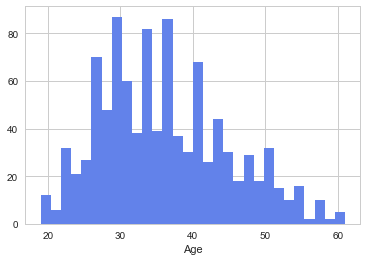

In [39]:
import seaborn as sns
sns.set_palette("coolwarm",7)
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.pyplot.xlabel('Age')

**Creating a jointplot showing Area Income versus Age.**

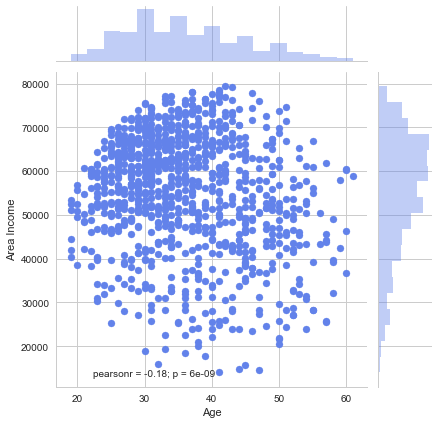

In [40]:
sns.jointplot(x='Age', y='Area Income', data=ad_data)

**Creating a jointplot showing the kernel density estimate distributions of Daily Time spent on site vs. Age.**

C:\Users\Selva\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


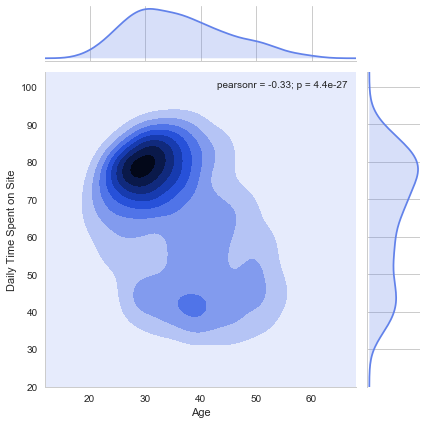

In [41]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,kind='kde')

** Creating a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

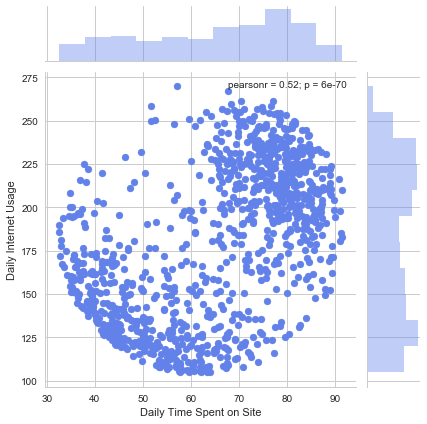

In [42]:
sns.jointplot(x=ad_data['Daily Time Spent on Site'], y=ad_data['Daily Internet Usage'])

** Creating a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

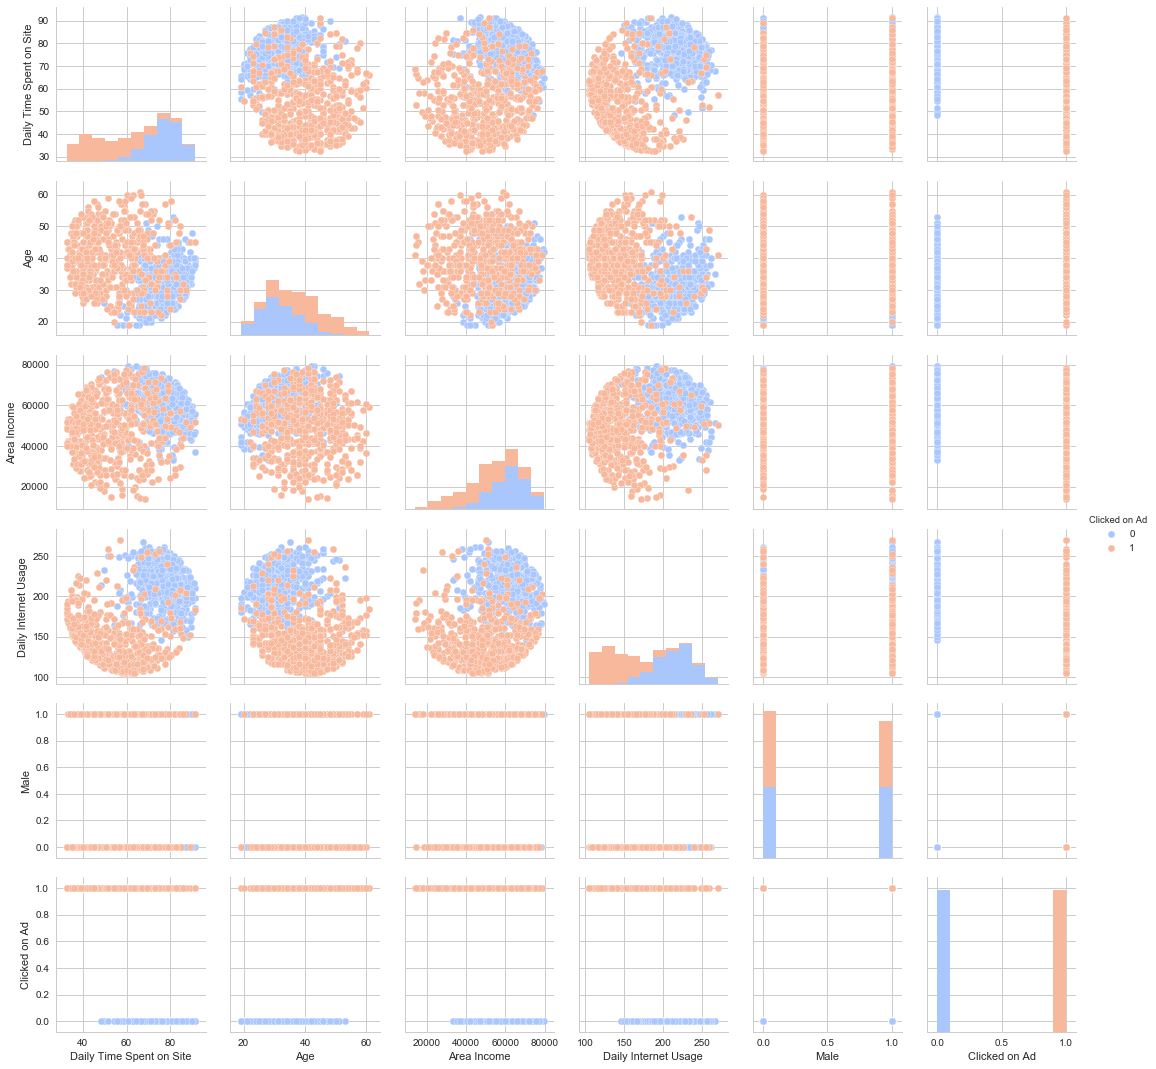

In [43]:
sns.pairplot(ad_data, hue='Clicked on Ad', palette='coolwarm')

# Logistic Regression

Now it's time to do a train test split, and train the model!

** Splitting the data into training set and testing set using train_test_split**

In [46]:
from sklearn.model_selection import train_test_split
y = ad_data['Clicked on Ad']
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

** Training and fitting a logistic regression model on the training set.**

In [28]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [30]:
predictions = logmodel.predict(X_test)

** Create a classification report for the model.**

In [44]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330



I trained a <a href= https://en.wikipedia.org/wiki/F1_score>model</a> able to classfy internet users and their propension to click on the ad with a relatively low error. In fact I got very good precision and recall scores. 